# IRIS Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Scikit-Learn 회귀 모델

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
X = df.iloc[:,[0,1,3,4]].values
y = df.iloc[:,2].values

In [5]:
# 테스트셋 분리
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size = 0.2, random_state =2021
)

In [9]:
# 회귀모델
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(f'MSE: {mse:.2f}, RMSE: {np.sqrt(mse):.2f}, R_squared: {r2:.4f}')

MSE: 0.10, RMSE: 0.31, R_squared: 0.9682


In [10]:
print('계수: ', lr.coef_)

계수:  [ 0.68227323 -0.51925158  1.11668415  0.37500635]


In [11]:
print('y: ',lr.intercept_)

y:  -0.36699949396033293


### 회귀식
- pl = 0.68sl - 0.51pw + 1.11 pw + 0.37class - 0.36

### 교차검증 - cross_val_score

In [12]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()

In [14]:
# 5 폴드 세트로 MSE를 구함
neg_maen_score = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-neg_maen_score)
avg_rmse = np.average(rmse_scores)

print('개별 MSE:', np.round(neg_maen_score,2))
print('개별 RMSE:', np.round(rmse_scores,2))
print(f'평균 RMSE: {avg_rmse:.4f}')

개별 MSE: [-0.06 -0.08 -0.14 -0.1  -0.21]
개별 RMSE: [0.25 0.28 0.38 0.32 0.46]
평균 RMSE: 0.3387


## IRIS 데이터 (class, sl, sw, pl) 로 pw 회귀식 구하기

In [15]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
X = df.iloc[:,[0,1,2,4]].values
y = df.iloc[:,3].values
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size = 0.2, random_state =2021
)

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(f'MSE: {mse:.2f}, RMSE: {np.sqrt(mse):.2f}, R_squared: {r2:.4f}')

MSE: 0.04, RMSE: 0.19, R_squared: 0.9226


In [18]:
print('계수: ', lr.coef_)

계수:  [-0.12876754  0.17861614  0.32741898  0.37562097]


In [19]:
print('y: ',lr.intercept_)

y:  -0.19445016041642282


### 회귀식
- pw = -0.12sl + 0.17pw + 0.32pl + 0.37class -0.19

### 교차검증 - cross_val_score

In [21]:
lr = LinearRegression()
neg_maen_score = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-neg_maen_score)
avg_rmse = np.average(rmse_scores)

print('개별 MSE:', np.round(neg_maen_score,2))
print('개별 RMSE:', np.round(rmse_scores,2))
print(f'평균 RMSE: {avg_rmse:.4f}')

개별 MSE: [-0.01 -0.02 -0.02 -0.04 -0.07]
개별 RMSE: [0.09 0.14 0.15 0.19 0.26]
평균 RMSE: 0.1667


## IRIS 데이터 (class, sw, pl, pw) 로 sl 회귀식 구하기

In [23]:
X = df.iloc[:,[1,2,3,4]].values
y = df.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size = 0.2, random_state =2021
)

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(f'MSE: {mse:.2f}, RMSE: {np.sqrt(mse):.2f}, R_squared: {r2:.4f}')

MSE: 0.07, RMSE: 0.27, R_squared: 0.8808


In [25]:
print('계수: ', lr.coef_)

계수:  [ 0.60733316  0.77406606 -0.49825608 -0.21265098]


In [26]:
print('y: ',lr.intercept_)

y:  1.904601213368351


### 회귀식
- sl = 0.6sw + 0.77pl -0.49pw -0.21class + 1.9

### 교차검증

In [29]:
lr = LinearRegression()
neg_maen_score = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-neg_maen_score)
avg_rmse = np.average(rmse_scores)

print('개별 MSE:', np.round(neg_maen_score,2))
print('개별 RMSE:', np.round(rmse_scores,2))
print(f'평균 RMSE: {avg_rmse:.4f}')

개별 MSE: [-0.06 -0.08 -0.14 -0.1  -0.14]
개별 RMSE: [0.25 0.29 0.37 0.31 0.38]
평균 RMSE: 0.3199


## IRIS 데이터 (class, sl, pl, pw) 로 sw 회귀식 구하기

In [30]:
X = df.iloc[:,[0,2,3,4]].values
y = df.iloc[:,1].values

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size = 0.2, random_state =2021
)

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(f'MSE: {mse:.2f}, RMSE: {np.sqrt(mse):.2f}, R_squared: {r2:.4f}')

MSE: 0.05, RMSE: 0.22, R_squared: 0.5667


In [32]:
print('계수: ', lr.coef_)

계수:  [ 0.61339502 -0.59499152  0.69803975 -0.12580651]


In [33]:
print('y: ',lr.intercept_)

y:  0.9976767818176957


### 회귀식
- sw = 0.61sl -0.59pl + 0.69pw -0.12class +0.99

### 교차검증

In [34]:
lr = LinearRegression()
neg_maen_score = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-neg_maen_score)
avg_rmse = np.average(rmse_scores)

print('개별 MSE:', np.round(neg_maen_score,2))
print('개별 RMSE:', np.round(rmse_scores,2))
print(f'평균 RMSE: {avg_rmse:.4f}')

개별 MSE: [-0.08 -0.11 -0.16 -0.08 -0.11]
개별 RMSE: [0.28 0.33 0.41 0.29 0.33]
평균 RMSE: 0.3289


### 시각화

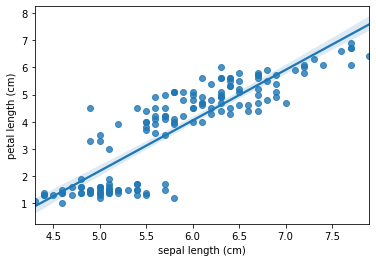

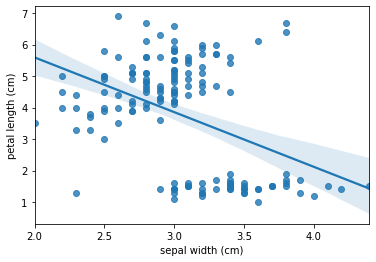

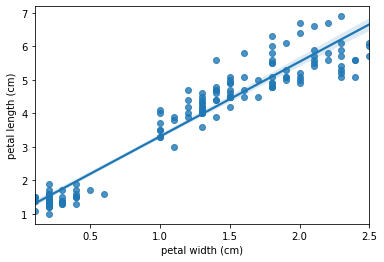

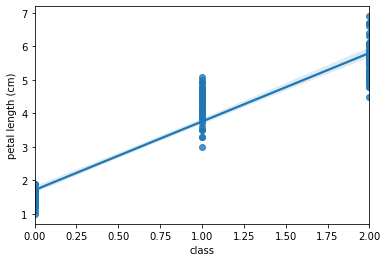

In [44]:
lm_features = df.drop('petal length (cm)',axis=1).columns
for feature in lm_features:
    sns.regplot(x=feature, y='petal length (cm)', data=df)
    plt.show()